In [1]:
from torchtext import *
from torchtext.data import *
from torch.utils.data import DataLoader

import nltk
nltk.download('punkt')
from nltk import word_tokenize

import torch
import torch.nn as nn
import torch.optim as optim

import time
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd
path = './E-c/2018-E-c-En-train.txt'
emotions_list = ['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']
df = pd.read_csv(path,sep='\t')
data_df = df
data_df

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,2017-En-21383,@nicky57672 Hi! We are working towards your hi...,0,0,0,0,0,0,0,0,0,0,0
6834,2017-En-41441,@andreamitchell said @berniesanders not only d...,0,1,0,0,0,0,0,0,0,1,0
6835,2017-En-10886,@isthataspider @dhodgs i will fight this guy! ...,1,0,1,0,0,0,0,1,0,0,0
6836,2017-En-40662,i wonder how a guy can broke his penis while h...,0,0,0,0,0,0,0,0,0,1,0


In [3]:
import pandas as pd
path = './E-c/2018-E-c-En-test-gold.txt'
emotion_list = ['ID','Tweet','anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']
df2 = pd.read_csv(path,sep='\t')
data2_df = df2
data2_df

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,1,1,0,0,0,0,1,0,0,0,1
1,2018-En-03739,"Academy of Sciences, eschews the normally sobe...",0,0,1,0,0,0,0,0,0,0,0
2,2018-En-00385,I blew that opportunity -__- #mad,1,0,1,0,0,0,0,0,1,0,0
3,2018-En-03001,This time in 2 weeks I will be 30... 😥,0,0,0,0,1,0,0,0,1,0,0
4,2018-En-01988,#Deppression is real. Partners w/ #depressed p...,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-En-03848,shaft abrasions from panties merely shifted to...,1,0,0,0,0,0,0,1,0,0,0
3255,2018-En-00416,@lomadia heard of Remothered? Indie horror gam...,0,1,0,0,0,0,0,1,0,0,0
3256,2018-En-03717,All this fake outrage. Y'all need to stop 🤣,1,0,1,0,0,0,0,0,0,0,0
3257,2018-En-03504,Would be ever so grateful if you could record ...,0,0,0,0,1,0,0,0,0,0,0


In [4]:
# import pandas as pd
# path = 'onlyengandsentiment_emotion_0_80000_with_neutral.csv'
# df = pd.read_csv(path)
# df.head()

In [5]:
# file_name = "./onlyengandsentiment_text.csv"
# data_df = pd.read_csv(file_name, encoding='utf8', dtype=str)
# data_df.head()

In [6]:
def filterUrl(df):
    import time
    time_start = time.time()
    print("  -> filterUrl()", end='')
    
    url_regex = r'^RT @\w+:'
    df['Tweet'] = df['Tweet'].str.replace(url_regex, '').astype(str)
    
    processed = len(df.index)
    time = time.time() - time_start
    print(" - Processed: {:,} | Time: {:,.3f} sec".format(processed, time))
    
    return df

def filterUrl2(df):
    import time
    time_start = time.time()
    print("  -> filterUrl()", end='')
    
    url_regex = r'@\w+'
    df['Tweet'] = df['Tweet'].str.replace(url_regex, '').astype(str)
    
    processed = len(df.index)
    time = time.time() - time_start
    print(" - Processed: {:,} | Time: {:,.3f} sec".format(processed, time))
    
    return df

def filterUrl3(df):
    import time
    time_start = time.time()
    print("  -> filterUrl()", end='')
    
    url_regex = r'#\w+'
    df['Tweet'] = df['Tweet'].str.replace(url_regex, '').astype(str)
    
    processed = len(df.index)
    time = time.time() - time_start
    print(" - Processed: {:,} | Time: {:,.3f} sec".format(processed, time))
    
    return df

def filterUrl4(df):
    import time
    time_start = time.time()
    print("  -> filterUrl()", end='')
    
    url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    df['Tweet'] = df['Tweet'].str.replace(url_regex, '').astype(str)
    
    processed = len(df.index)
    time = time.time() - time_start
    print(" - Processed: {:,} | Time: {:,.3f} sec".format(processed, time))
    
    return df

def filterUrl5(df):
    import time
    time_start = time.time()
    print("  -> filterUrl()", end='')
    
    url_regex = r'^"'
    df['Tweet'] = df['Tweet'].str.replace(url_regex, '').astype(str)
    
    processed = len(df.index)
    time = time.time() - time_start
    print(" - Processed: {:,} | Time: {:,.3f} sec".format(processed, time))
    
    return df

def filterUrl6(df):
    import time
    time_start = time.time()
    print("  -> filterUrl()", end='')
    
    url_regex = r'"$'
    df['Tweet'] = df['Tweet'].str.replace(url_regex, '').astype(str)
    
    processed = len(df.index)
    time = time.time() - time_start
    print(" - Processed: {:,} | Time: {:,.3f} sec".format(processed, time))
    
    return df

def filterDuplicate(df):
    import time
    time_start = time.time()
    print("  -> filterDuplicate()", end='')
    
    remove = df.duplicated(keep='first')
    result = df[~remove]
    
#     print("Removed: {} \n".format(df[remove].head()))
    
    processed = len(df.index)
    skipped = processed - len(result.index)
    skipped_percentage = skipped / processed * 100
    
    time = time.time() - time_start
    print(" - Processed: {:,} | Skipped: {:,} ({:.2f}%) | Time: {:,.3f} sec".format(processed, skipped, skipped_percentage, time))
    
    return result


import demoji

def checkNonEngAndEmoji(row):
    text = row['Tweet']
    text_emoji = demoji.replace(text, '')
    row['Tweet'] = text_emoji
        
    return row


In [7]:
data_df = filterDuplicate(data_df)
data_df = filterUrl5(data_df)
data_df = filterUrl6(data_df)
data_df = filterUrl(data_df)
data_df = filterUrl2(data_df)
data_df = filterUrl3(data_df)
data_df = filterUrl4(data_df)
data_df = data_df.apply(checkNonEngAndEmoji, axis=1)
data_df

  -> filterDuplicate() - Processed: 6,838 | Skipped: 0 (0.00%) | Time: 0.011 sec
  -> filterUrl() - Processed: 6,838 | Time: 0.017 sec
  -> filterUrl() - Processed: 6,838 | Time: 0.009 sec
  -> filterUrl() - Processed: 6,838 | Time: 0.012 sec
  -> filterUrl() - Processed: 6,838 | Time: 0.007 sec
  -> filterUrl() - Processed: 6,838 | Time: 0.007 sec
  -> filterUrl() - Processed: 6,838 | Time: 0.006 sec


,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,it also helps that the majority of NFL coach...,1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,2017-En-21383,Hi! We are working towards your highlighted c...,0,0,0,0,0,0,0,0,0,0,0
6834,2017-En-41441,said not only did not play up HRC in campaig...,0,1,0,0,0,0,0,0,0,1,0
6835,2017-En-10886,i will fight this guy! Don't insult the lion...,1,0,1,0,0,0,0,1,0,0,0
6836,2017-En-40662,i wonder how a guy can broke his penis while h...,0,0,0,0,0,0,0,0,0,1,0


In [8]:
data2_df = filterDuplicate(data2_df)
data2_df = filterUrl5(data2_df)
data2_df = filterUrl6(data2_df)
data2_df = filterUrl(data2_df)
data2_df = filterUrl2(data2_df)
data2_df = filterUrl3(data2_df)
data2_df = filterUrl4(data2_df)
data2_df = data2_df.apply(checkNonEngAndEmoji, axis=1)
data2_df

  -> filterDuplicate() - Processed: 3,259 | Skipped: 0 (0.00%) | Time: 0.008 sec
  -> filterUrl() - Processed: 3,259 | Time: 0.007 sec
  -> filterUrl() - Processed: 3,259 | Time: 0.003 sec
  -> filterUrl() - Processed: 3,259 | Time: 0.010 sec
  -> filterUrl() - Processed: 3,259 | Time: 0.005 sec
  -> filterUrl() - Processed: 3,259 | Time: 0.007 sec
  -> filterUrl() - Processed: 3,259 | Time: 0.003 sec


,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-01559,Dont worry Indian army is on its ways to dis...,1,1,0,0,0,0,1,0,0,0,1
1,2018-En-03739,"Academy of Sciences, eschews the normally sobe...",0,0,1,0,0,0,0,0,0,0,0
2,2018-En-00385,I blew that opportunity -__-,1,0,1,0,0,0,0,0,1,0,0
3,2018-En-03001,This time in 2 weeks I will be 30...,0,0,0,0,1,0,0,0,1,0,0
4,2018-En-01988,is real. Partners w/ people truly dont under...,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-En-03848,shaft abrasions from panties merely shifted to...,1,0,0,0,0,0,0,1,0,0,0
3255,2018-En-00416,heard of Remothered? Indie horror game. Writi...,0,1,0,0,0,0,0,1,0,0,0
3256,2018-En-03717,All this fake outrage. Y'all need to stop,1,0,1,0,0,0,0,0,0,0,0
3257,2018-En-03504,Would be ever so grateful if you could record ...,0,0,0,0,1,0,0,0,0,0,0


In [9]:
# print(len(data_df))
# data_df.head(10)

In [10]:
data_df.rename(columns = {'Tweet':'text'}, inplace = True)
data2_df.rename(columns = {'Tweet':'text'}, inplace = True)

In [11]:
data_df

,ID,text,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,it also helps that the majority of NFL coach...,1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,2017-En-21383,Hi! We are working towards your highlighted c...,0,0,0,0,0,0,0,0,0,0,0
6834,2017-En-41441,said not only did not play up HRC in campaig...,0,1,0,0,0,0,0,0,0,1,0
6835,2017-En-10886,i will fight this guy! Don't insult the lion...,1,0,1,0,0,0,0,1,0,0,0
6836,2017-En-40662,i wonder how a guy can broke his penis while h...,0,0,0,0,0,0,0,0,0,1,0


In [12]:
data2_df

,ID,text,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-01559,Dont worry Indian army is on its ways to dis...,1,1,0,0,0,0,1,0,0,0,1
1,2018-En-03739,"Academy of Sciences, eschews the normally sobe...",0,0,1,0,0,0,0,0,0,0,0
2,2018-En-00385,I blew that opportunity -__-,1,0,1,0,0,0,0,0,1,0,0
3,2018-En-03001,This time in 2 weeks I will be 30...,0,0,0,0,1,0,0,0,1,0,0
4,2018-En-01988,is real. Partners w/ people truly dont under...,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-En-03848,shaft abrasions from panties merely shifted to...,1,0,0,0,0,0,0,1,0,0,0
3255,2018-En-00416,heard of Remothered? Indie horror game. Writi...,0,1,0,0,0,0,0,1,0,0,0
3256,2018-En-03717,All this fake outrage. Y'all need to stop,1,0,1,0,0,0,0,0,0,0,0
3257,2018-En-03504,Would be ever so grateful if you could record ...,0,0,0,0,1,0,0,0,0,0,0


In [13]:
data_df.to_csv('6k-train.csv', header=True, index=False, encoding='utf-8')
data2_df.to_csv('6k-test.csv', header=True, index=False, encoding='utf-8')

In [14]:
# from sklearn.model_selection import train_test_split

# train_ratio = 0.8
# train_len = int((len(df))*(train_ratio))
# test_len = len(df) - train_len

# data = data_df
# label = df.drop('ind',axis=1)

# X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=1234)

# train_set = pd.concat([X_train,y_train],axis=1)
# valid_set = pd.concat([X_test,y_test],axis=1)
# train_set.to_csv('train-80000.csv', mode='w', header=True, index=False)
# valid_set.to_csv('valid-80000.csv', mode='w', header=True, index=False)

In [15]:
# print(label)

In [16]:
# 5.3.1
from torchtext import *
from torchtext.data import *

import nltk
nltk.download('punkt')
from nltk import word_tokenize

txt_field = data.Field(tokenize=word_tokenize, lower=True, include_lengths=True, batch_first=True)
label_field = data.Field(sequential=False, use_vocab=False, batch_first=True)

field = [('ID', None),('text', txt_field),('anger', label_field),('anticipation', label_field),('disgust', label_field),('fear', label_field),('joy', label_field),('love', label_field),('optimism', label_field),('pessimism', label_field),('sadness', label_field),('surprise', label_field),('trust', label_field)]

# make splits for data
train, validation= TabularDataset.splits(path='.', train='6k-train.csv', validation='6k-test.csv',format='csv', 
                                  fields=field, skip_header=True)


# build the vocabulary on the training set only
txt_field.build_vocab(train,vectors=vocab.Vectors("glove.840B.300d.txt"), min_freq=3,max_size=20000)

label_field.build_vocab(train)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# make iterator for splits
train_iter, valid_iter = data.BucketIterator.splits((train, validation), batch_size=32, 
                                                   sort_key=lambda x: len(x.text),sort_within_batch=True,device=device)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
class BatchWrapper:
    def __init__(self, dl, x_var, y_vars):
        self.dl, self.x_var, self.y_vars = dl, x_var, y_vars # 传入自变量x列表和因变量y列表

    def __iter__(self):
        for batch in self.dl:
            x = getattr(batch, self.x_var) # 在这个封装中只有一个自变量

            if self.y_vars is not None: # 把所有因变量cat成一个向量
                temp = [getattr(batch, feat).unsqueeze(1) for feat in self.y_vars]
                y = torch.cat(temp, dim=1).float()
            else:
                y = torch.zeros((1))

            yield (x, y)

    def __len__(self):
        return len(self.dl)

train_dl = BatchWrapper(train_iter, "text", emotions_list)
valid_dl = BatchWrapper(valid_iter, "text", emotions_list)

In [18]:
input_dim = len(txt_field.vocab)
embedding_dim = 64
hidden_dim = 128
output_dim = 11
dropout = 0.3
num_layers = 3
input_dim

3446

In [19]:
class LSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers = n_layers,
            dropout = dropout,
            batch_first=True
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_len):
        embedded = self.embedding(text)
        output, (last_hidden_state, last_cell_state) = self.rnn(embedded)
        linear_input = last_hidden_state[-1]
        return self.fc(self.dropout(linear_input))

In [20]:
def count_parameters(model):
    temp = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f'The model architecture:\n\n', model)
    print(f'\nThe model has {temp:,} trainable parameters')

model = LSTM(input_dim, embedding_dim, hidden_dim, output_dim, num_layers, dropout)

In [21]:
count_parameters(model)

The model architecture:

 LSTM(
  (embedding): Embedding(3446, 64)
  (rnn): LSTM(64, 128, num_layers=3, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=11, bias=True)
)

The model has 585,483 trainable parameters


In [22]:
def test_accuracy(tensor, y):
    preds = torch.round(torch.sigmoid(tensor))
    correct = (preds == y).float()
    return correct.sum() / len(correct) * 100


def save_checkpoint(save_path, model, optimizer, val_loss):
    if save_path==None:
        return
    save_path = save_path 
    state_dict = {'model_state_dict': model.state_dict(),
                  'optimizer_state_dict': optimizer.state_dict(),
                  'val_loss': val_loss}
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_checkpoint(model, optimizer, save_path):
    state_dict = torch.load(save_path)
    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])
    val_loss = state_dict['val_loss']
    print(f'Model loaded from <== {save_path}')
    return val_loss


def TRAIN(net, train_iter, valid_iter, num_epochs, eval_every, total_step, criterion, optimizer, val_loss, device, save_name):
    
    running_loss = 0.0
    running_corrects = 0
    running_num = 0
    global_step = 0
    train_loss = []
    valid_loss = []
    count = []
    if val_loss==None:
        best_val_loss = float("Inf")  
    else: 
        best_val_loss=val_loss

    since = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        
        for batch in train_iter: ## batch is ((text, text_len_array), 2d_labels), text_len_array hv all same value thx to BucketIterator
            
            net.train()

            '''Training of the model'''
            # Forward pass
            text = batch[0][0] 
            text_len = batch[0][1][0].item()
            label = batch[1]
            
            outputs = net(text, text_len).squeeze(1)
            loss = criterion(outputs, label)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            global_step += 1

            running_loss += loss.item()

            '''Evaluating the model every x steps'''
            if global_step % eval_every == 0:
                with torch.no_grad():
                    net.eval()
                    val_running_loss = 0.0
                    for val_batch in valid_iter:
                        val_text = val_batch[0][0]
                        val_text_len = val_batch[0][1][0].item()
                        val_label = val_batch[1]
                        
                        val_outputs = net(val_text, val_text_len).squeeze(1)
                        val_loss = criterion(val_outputs, val_label)
                        val_running_loss += val_loss.item()

                    average_train_loss = running_loss / eval_every
                    average_val_loss = val_running_loss / len(valid_iter)
                    train_loss.append(average_train_loss)
                    valid_loss.append(average_val_loss)
                    count.append(global_step)

                    print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                          .format(epoch+1, num_epochs, global_step, total_step, average_train_loss, average_val_loss))

                    running_loss = 0.0
                    
                    if average_val_loss < best_val_loss:
                        best_val_loss = average_val_loss
                        save_checkpoint(save_name, net, optimizer, best_val_loss)

    print('Finished Training, training time: %.4f' % (time.time() - since))

    print('training loss: %.4f\nvalidation loss: %.4f' % (train_loss[-1], valid_loss[-1]))
    plot_x = count
    p1, = plt.plot(plot_x, train_loss, color='red', linewidth=1, label='training loss')
    p2, = plt.plot(plot_x, valid_loss,  color='blue', linewidth=1, label='validation loss')
    plt.legend(handles=[p1, p2], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('loss')
    plt.xlabel('number of evaluation')
    plt.title('loss over number of evaluation')
    plt.show()

    return train_loss, valid_loss


def eval(model, iterator):
    
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            text = batch[0][0]
            text_len = batch[0][1][0].item()
            label = batch[1]

            outputs = model(text, text_len).squeeze(1)
            acc = test_accuracy(outputs, label) / 11

            epoch_acc += acc.item()

    avg_acc = epoch_acc / len(iterator)
    print(f'Test accuracy: {avg_acc}%')

Epoch [5/30], Step [1000/6420], Train Loss: 0.4720, Valid Loss: 0.4598
Model saved to ==> tweet_net.pt
Epoch [10/30], Step [2000/6420], Train Loss: 0.3974, Valid Loss: 0.4736
Epoch [15/30], Step [3000/6420], Train Loss: 0.3402, Valid Loss: 0.5077
Epoch [19/30], Step [4000/6420], Train Loss: 0.3051, Valid Loss: 0.5128
Epoch [24/30], Step [5000/6420], Train Loss: 0.2785, Valid Loss: 0.5587
Epoch [29/30], Step [6000/6420], Train Loss: 0.2506, Valid Loss: 0.5923
Finished Training, training time: 84.8331
training loss: 0.2506
validation loss: 0.5923


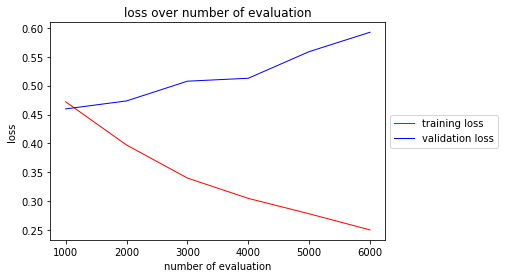

In [23]:
model = LSTM(input_dim, embedding_dim, hidden_dim, output_dim, num_layers, dropout).to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss().to(device)
num_epochs = 30
eval_every = 100
total_step = len(train_iter)*num_epochs
best_val_loss = None
save_path = f'tweet_net.pt'

train_loss, valid_loss = TRAIN(model, train_dl, valid_dl, num_epochs, eval_every, total_step, criterion, optimizer, 
      best_val_loss, device, save_path)

#eval(model2, test_iter)

In [24]:
load_checkpoint(model, optimizer, f'tweet_net.pt')

Model loaded from <== tweet_net.pt


0.4597681524122463

In [25]:
eval(model, valid_dl)

Test accuracy: 79.13314333149032%
